In [ ]:
#Using import for library initialisation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [ ]:
#Reading the GAIT dataset
gait_dta=pd.read_csv("Gait_Data.csv")

In [ ]:
#Transfrom NA into 0
gait_dta=gait_dta.fillna(0)

In [ ]:
#Datatype information of GAIT dataset columns
gait_dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181800 entries, 0 to 181799
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   subject      181800 non-null  int64  
 1   replication  181800 non-null  int64  
 2   leg          181800 non-null  int64  
 3   joint        181800 non-null  int64  
 4   time         181800 non-null  int64  
 5   angle        181800 non-null  float64
 6   condition    181800 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 9.7 MB


In [ ]:
# Target variable and feature variables initialisation
feat_dta = gait_dta.drop(['condition'],axis=1)
targ_dta = gait_dta.loc[:,'condition']

In [ ]:
#Splitting the values into training set and test set
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(feat_dta, targ_dta ,test_size=0.20,random_state=10)

In [ ]:
#Logistic Regression machine learning algorithm
import warnings
with warnings.catch_warnings(record=True):
    lreg_model = LogisticRegression()
    lreg_model.fit(X_train1, Y_train1)
    Y_predc1 = lreg_model.predict(X_test1)
    print("Logistic Regression machine learning algorithms classification report->\n",classification_report(Y_test1, Y_predc1))
    print('Logistic Regression machine learning algorithms mean absolute error->', mean_absolute_error(Y_test1, Y_predc1))
    print('Logistic Regression machine learning algorithms root mean square error->', np.sqrt(mean_squared_error(Y_test1, Y_predc1)))
    print('Logistic Regression machine learning algorithms r-squared score->',r2_score(Y_test1, Y_predc1))

Logistic Regression machine learning algorithms classification report->
               precision    recall  f1-score   support

           1       0.36      0.51      0.42     12018
           2       0.48      0.06      0.11     12216
           3       0.39      0.57      0.46     12126

    accuracy                           0.38     36360
   macro avg       0.41      0.38      0.33     36360
weighted avg       0.41      0.38      0.33     36360

Logistic Regression machine learning algorithms mean absolute error-> 0.9037128712871287
Logistic Regression machine learning algorithms root mean square error-> 1.2123652432119187
Logistic Regression machine learning algorithms r-squared score-> -1.2135400135066


In [ ]:
#Random Forest machine learning algorithm
import warnings
with warnings.catch_warnings(record=True):
    rforest_model = RandomForestClassifier(random_state=35)
    rforest_model.fit(X_train1, Y_train1)
    Y_predc2 = rforest_model.predict(X_test1)
    print("Random Forest machine learning algorithms classification report->\n",classification_report(Y_test1, Y_predc2))
    print('Random Forest machine learning algorithms mean absolute error->', mean_absolute_error(Y_test1, Y_predc2))
    print('Random Forest machine learning algorithms root mean square error->', np.sqrt(mean_squared_error(Y_test1, Y_predc2)))
    print('Random Forest machine learning algorithms r-squared score->',r2_score(Y_test1, Y_predc2))

Random Forest machine learning algorithms classification report->
               precision    recall  f1-score   support

           1       0.59      0.60      0.59     12018
           2       0.67      0.66      0.66     12216
           3       0.61      0.61      0.61     12126

    accuracy                           0.62     36360
   macro avg       0.62      0.62      0.62     36360
weighted avg       0.62      0.62      0.62     36360

Random Forest machine learning algorithms mean absolute error-> 0.5308855885588559
Random Forest machine learning algorithms root mean square error-> 0.9148421686932462
Random Forest machine learning algorithms r-squared score-> -0.26041270420858376


In [ ]:
#Decision Tree machine learning algorithm
import warnings
with warnings.catch_warnings(record=True):
    dtree_model = DecisionTreeClassifier(random_state=35)
    dtree_model.fit(X_train1, Y_train1)
    Y_predc3 = dtree_model.predict(X_test1)
    print("Decision Tree machine learning algorithms classification report->\n",classification_report(Y_test1, Y_predc3))
    print('Decision Tree machine learning algorithms mean absolute error->', mean_absolute_error(Y_test1, Y_predc3))
    print('Decision Tree machine learning algorithms root mean square error->', np.sqrt(mean_squared_error(Y_test1, Y_predc3)))
    print('Decision Tree machine learning algorithms r-squared score->',r2_score(Y_test1, Y_predc3))

Decision Tree machine learning algorithms classification report->
               precision    recall  f1-score   support

           1       0.63      0.63      0.63     12018
           2       0.70      0.68      0.69     12216
           3       0.65      0.65      0.65     12126

    accuracy                           0.66     36360
   macro avg       0.66      0.66      0.66     36360
weighted avg       0.66      0.66      0.66     36360

Decision Tree machine learning algorithms mean absolute error-> 0.4789053905390539
Decision Tree machine learning algorithms root mean square error-> 0.866676186797166
Decision Tree machine learning algorithms r-squared score-> -0.13118633513984523


In [ ]:
#PCA Clustering machine learning algorithm
prncpl_comp = PCA()
data = feat_dta.values
prncpl_comp.fit(data)
gait_pca = prncpl_comp.transform(data)

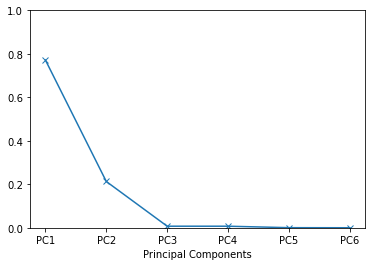

In [ ]:
#Elbow plot for PCA analysis
import warnings
with warnings.catch_warnings(record=True):
    coord = plt.gca()
    varinc_explaind = prncpl_comp.explained_variance_ratio_
    coord.plot(varinc_explaind, marker='x')
    coord.set_xlabel('Principal Components')
    coord.set_ylim(0,1.)
    coord.set_xticklabels(["PC{}".format(i) for i in range(7)])

In [ ]:
#Output for all the principal component variance explained
print("Output for all the principal component variance explained:",varinc_explaind)

Output for all the principal component variance explained: [7.71523524e-01 2.13027449e-01 7.33827594e-03 7.30967285e-03
 5.79990313e-04 2.21087688e-04]


Text(0, 0.5, 'Principal Comp2')

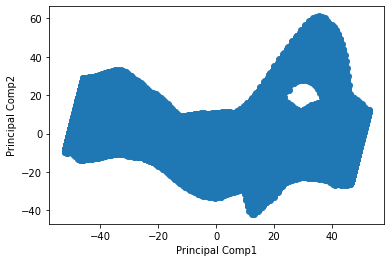

In [ ]:
#Principal Component 1 vs Principal Component 2 plot
coord = plt.gca()
coord.scatter(gait_pca[:,0], gait_pca[:,1])
coord.set_xlabel('Principal Comp1')
coord.set_ylabel('Principal Comp2')